In [1]:
#Some imports:
#%pip install numpy
#%pip install scipy
#%pip install matplotlib
import sys
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

#import changepoint classes:
from data import Data
from changepoint_model import ChangepointModel
from regime_model import RegimeModel
from multinomial_dirichlet import MultinomialDirichlet
from normal_normal_inverse_gamma import NormalNIG
from normal_linear_model import NormalLinearModel
from uniform_pareto import UniformPareto
from probability_model import ProbabilityModel
from poisson_gamma import PoissonGamma
from exponential_gamma import ExponentialGamma
from simulate_changepoint_data import *

In [2]:
#Simulate changepoint data
n=1000
lambda_cps=.01
seed=1
probability_models=[]
probability_models.append(MultinomialDirichlet(k=np.array([3,5],dtype=int),alpha=1))
probability_models.append(NormalNIG(p=3))
probability_models.append(NormalLinearModel(p=4))
tau,regimes,inclusion_vectors,xys=simulate(n,probability_models,seed=seed,lambda_cps=lambda_cps)

In [3]:
# show the sizes of the x (time points) and y (data values) matrices generated for each probability model
for _ in range(len(xys)):
    x,y=xys[_].x,xys[_].y
    print(x.shape,y.shape)

(1000,) (2, 1000)
(1000,) (3, 1000)
(1000,) (4, 1000)


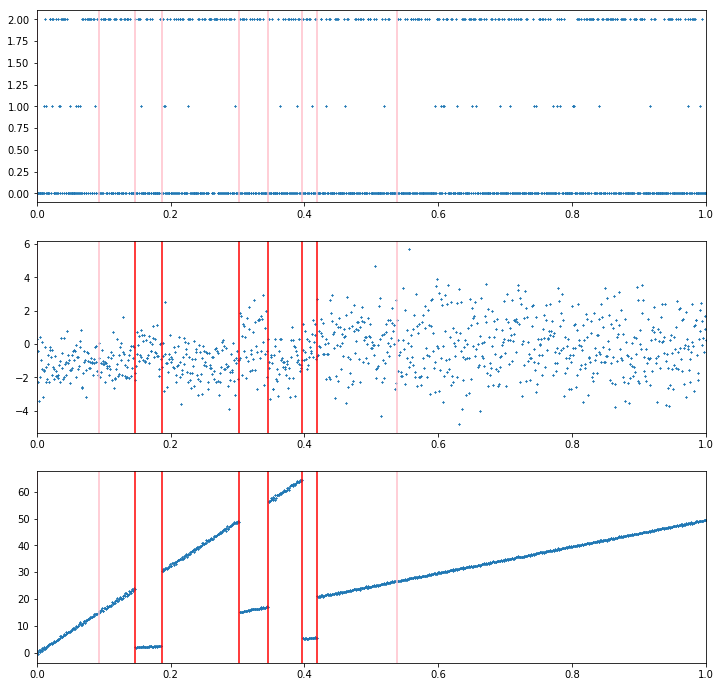

In [4]:
# Plot the data which have been generated.
# For each probabilty model which may be multivaraite, plot dimension corresponding to plot_dim
plot_data(tau,regimes,inclusion_vectors,xys,plot_dim=0)


In [5]:
for i in range(len(probability_models)):
    probability_models[i].add_data(xys[i])

In [6]:
cpm=ChangepointModel(probability_models,infer_regimes=True,disallow_successive_regimes=True,spike_regimes=False)#,pg])
cpm.mcmc(5000,seed=10,hill_climbing=True)
estimated_cps,estimated_regimes=cpm.get_effective_changepoint_locations()

-inf:0	0.0065982788847115895:1	0.02250053985229463:2	0.06712516185577669:3	0.14667792885240172:4	0.18741227812215958:5	0.3014395573547494:6	0.3458716708435163:7	0.3469778257413403:5	0.3972347342276392:8	0.4187322940413464:6
0:True,True,True	1:True,True,True	2:True,False,True	3:False,False,True	4:False,True,True	5:False,True,True	6:False,True,True	7:False,True,True	8:False,True,True
Final posterior=-18396.572376316024
delete_changepoint:	3/1027	0.2921129503407984%
change_regime:	8/1015	0.7881773399014778%
shift_changepoint:	43/990	4.343434343434343%
change_regime_inclusion:	18/985	1.8274111675126905%
add_changepoint:	13/983	1.3224821973550356%
E[#Changepoints] = 8.6802


In [7]:
print(cpm.get_effective_changepoint_locations())

(array([0.007, 0.023, 0.067, 0.147, 0.187, 0.301, 0.346, 0.347, 0.397,
       0.419]), array([1, 2, 3, 4, 5, 6, 7, 5, 8, 6]))


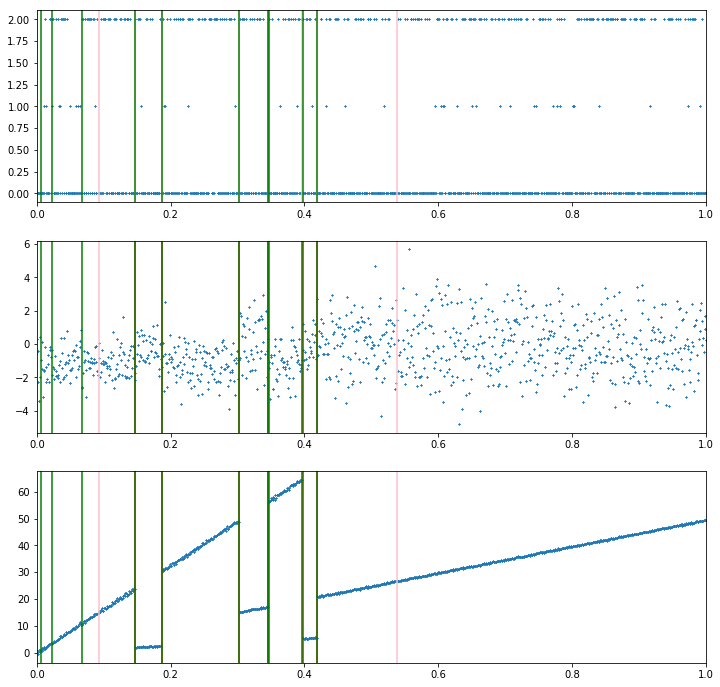

In [8]:
plot_data(tau,regimes,inclusion_vectors,xys,estimated_cps=estimated_cps,estimated_regimes=estimated_regimes,plot_dim=0)